# Identifying the dates most trips were taken and assessing the relationship between user type and member gender on trips taken.

## Investigation Overview

> In this investigation, I wanted to identify the dates most trips were taken and assess the relationship between user type and member gender on trips.


## Dataset Overview

> The data consisted of 183412 trips information and 16 columns of attributes. Upon splitting of timestamp into date and time and creation of additional columns, the columns increased to 18. The column attributes include (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). The dataset comprises of data for customers and subscribers who are either males, females or of other gender identification.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")
dfc = df.copy()
dfc.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
dfc = dfc.fillna(0)
dfc['member_birth_year'] = dfc['member_birth_year'].astype(int)

dfc["start_time"] = pd.to_datetime(dfc["start_time"])
dfc["end_time"] = pd.to_datetime(dfc["end_time"])

dfc['start_date'] = [d.date() for d in dfc['start_time']]
dfc['start_time'] = [d.time() for d in dfc['start_time']]

second_column = dfc.pop('start_date') #reposition the new start_date column to the 2nd column position on the table
dfc.insert(2, 'start_date', second_column)

third_column = dfc.pop('start_time') #reposition the new start_time column to the 3rd column position on the table
dfc.insert(4, 'start_time', third_column)

dfc['end_date'] = [d.date() for d in dfc['end_time']]
dfc['end_time'] = [d.time() for d in dfc['end_time']]

forth_column = dfc.pop('end_date') #reposition the new end_date column to the 4th column position on the table
dfc.insert(3, 'end_date', forth_column)

fifth_column = dfc.pop('end_time') #reposition the new end_time column to the 5th column position on the table
dfc.insert(5, 'end_time', fifth_column)

sixth_column = dfc.pop('start_station_id') #reposition the new end_time column to the 5th column position on the table
dfc.insert(6, 'start_station_id', sixth_column)

### Looking at the member gender and start date of trips.

> The first graph which showed the member gender distribution established that majority of those who took trips were males, followed by females and then a few who identified as others. There were also a few who were categorized as zero (0), probably due to data entry error.

> The second graph also showed the distribution of the trip start dates. All the trips were taken in february 2019 and in 28 days, with most of the trips falling on 5th, 6th, 7th, 11th, 12th, 19th, 20th, 21st, 22nd and 28th, all of february 2019.

> It is necessary to understanding these two distributions to understand what gender dominates the members data and the pattern of trip start dates.

> See next slide for the visuals.

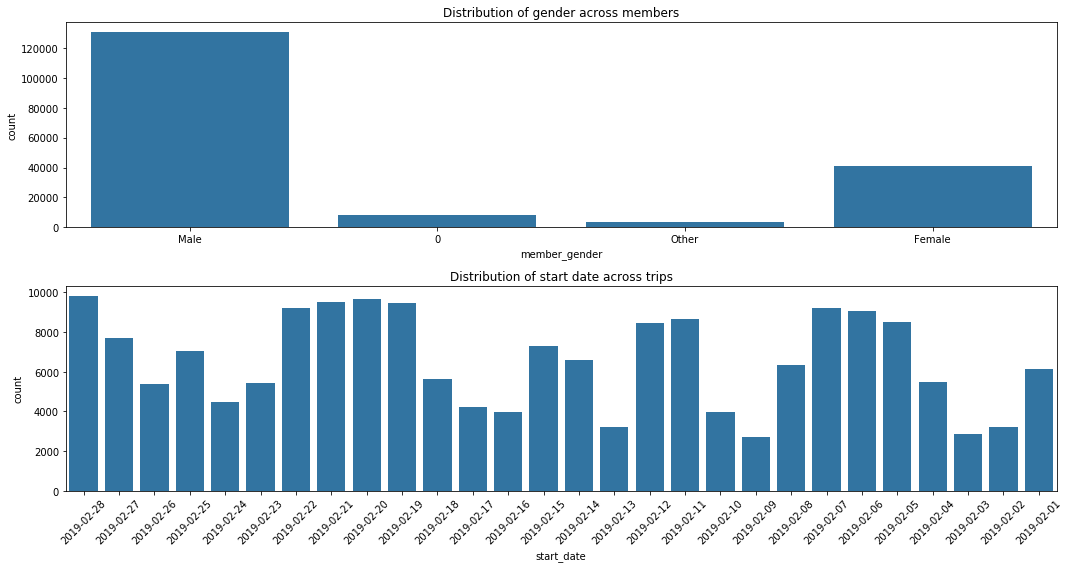

In [4]:
fig, ax = plt.subplots(nrows=2, figsize = [15,8])
default_color = sb.color_palette()[0]
sb.countplot(data = dfc, x = 'member_gender', color = default_color, ax = ax[0]).set(title='Distribution of gender across members')
sb.countplot(data = dfc, x = 'start_date', color = default_color, ax = ax[1]).set(title='Distribution of start date across trips')
plt.xticks(rotation=45)

fig.tight_layout()

plt.show()

### User types and how much trips they took.

> This aims to compare the user types (customers and subscriber) in relation to the total duration of trips each user type took for the period of all trips.

> Findings revealed that majority of trip duration was covered by subscribers. Subscribers took more trips or took longer trips than customers, which makes it the major user type that influenced trip duration.

> This became necessary as it is important to understand which user type is more active in taking trips and which is less active.

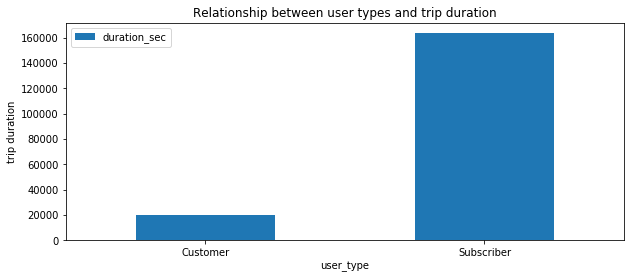

In [5]:
dfc.groupby(['user_type'])[['duration_sec']].count().plot(kind='bar', title='Relationship between user types and trip duration', figsize = [10,4]).set_ylabel('trip duration')
plt.xticks(rotation=0);

### How much trips is taken by different genders?

> Here we try to understand the relationships between gender categories and trip duration. Which of the gender categories took the most of the trips and which took less.

> The outcome showed that male members took far more trips than females and other members.

> This became necessary to know as it is important to understand the distribution of gender categories in relation to the duration of trips.

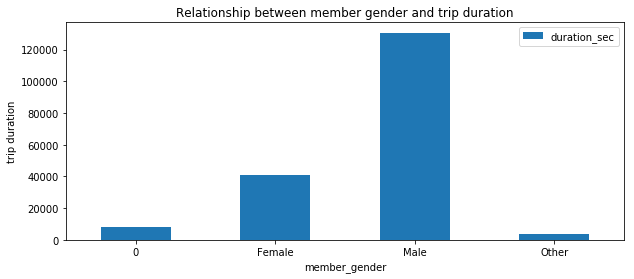

In [6]:
dfc.groupby(['member_gender'])[['duration_sec']].count().plot(kind='bar', title='Relationship between member gender and trip duration', figsize = [10,4]).set_ylabel('trip duration')
plt.xticks(rotation=0);

### How member gender and start date compare to user types.

> Also important to understand is the relationship between user types and gender, with user type and start date. How many users who are customers or subscribers are either males, females or identify otherwise. Like wise, how many users who are subscribers or customers started their trips at a particular dates. These questions are important to answer to understand who the customers and subscribers are and how it influences the start of their trips.

> The findings showed that both subscribers and customers are mostly males, followed by females.

> Customers and subscribers also have a similar distribution across the date they started their trips.

> See next slide for visuals

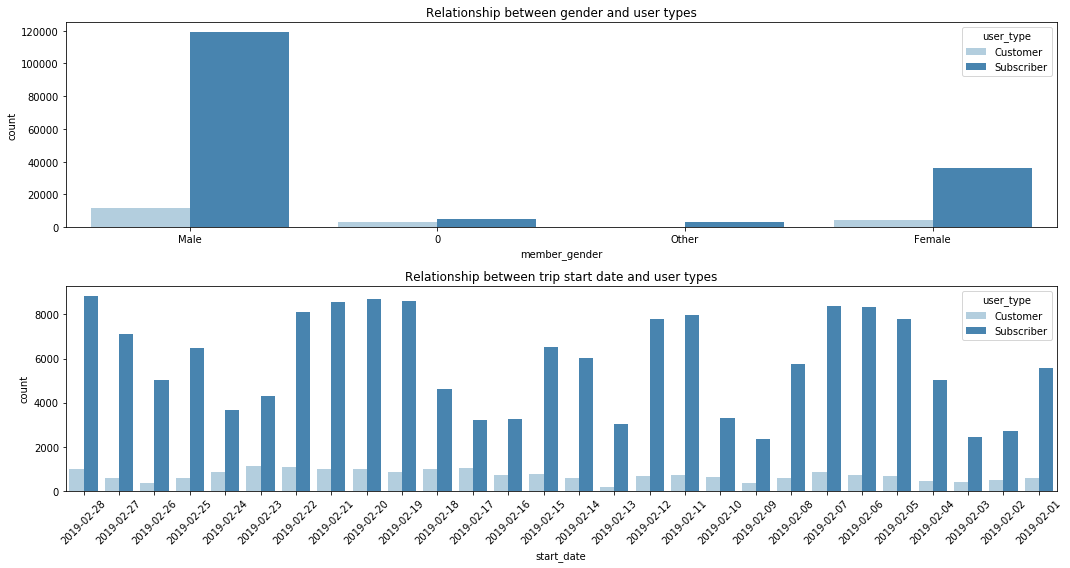

In [7]:
fig, ax = plt.subplots(nrows=2, figsize = [15,8])

sb.countplot(data = dfc, x = 'member_gender', hue = 'user_type', palette = 'Blues', ax = ax[0]).set(title='Relationship between gender and user types')
sb.countplot(data = dfc, x = 'start_date', hue = 'user_type', palette = 'Blues', ax = ax[1]).set(title='Relationship between trip start date and user types')
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 285144 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/